In [1]:
from google.colab import files
uploaded = files.upload()

Saving investments.csv to investments.csv


In [2]:
print(__doc__)

import seaborn as sns

sns.set_context("poster")

Automatically created module for IPython interactive environment


In [3]:
import pandas as pd

import numpy as np

from collections import Counter

from sklearn.datasets import make_classification

from imblearn.under_sampling import ClusterCentroids

from collections import Counter

from numpy import where

from matplotlib import pyplot

from imblearn.under_sampling import NearMiss

In [4]:
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean

In [5]:
import io
df = pd.read_csv(io.BytesIO(uploaded['investments.csv']))
# Dataset is now stored in a Pandas Dataframe

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114506 entries, 0 to 114505
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114506 non-null  object 
 1   company_name             114505 non-null  object 
 2   company_category_list    111242 non-null  object 
 3   company_market           111240 non-null  object 
 4   company_country_code     107147 non-null  object 
 5   company_state_code       79158 non-null   object 
 6   company_region           107147 non-null  object 
 7   company_city             105801 non-null  object 
 8   investor_permalink       114440 non-null  object 
 9   investor_name            114440 non-null  object 
 10  investor_category_list   30507 non-null   object 
 11  investor_market          30455 non-null   object 
 12  investor_country_code    86521 non-null   object 
 13  investor_state_code      62274 non-null   object 
 14  inve

In [7]:
#replace all Nan to 0 in raised_amount_usd column
df['raised_amount_usd'] = df['raised_amount_usd'].fillna(0)

In [8]:
#convert column raised_amount_usd from float to int
df = df.astype({"raised_amount_usd":'int'})

In [9]:
# removing features
df = df.drop(['investor_category_list','investor_market','funded_at', 'company_state_code','investor_state_code','funding_round_code',
                      'funded_month','funded_quarter','funding_round_permalink','company_permalink','investor_permalink'], axis=1)

In [10]:
#Dropping all the null value
df.dropna(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77929 entries, 8 to 114498
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   company_name           77929 non-null  object
 1   company_category_list  77929 non-null  object
 2   company_market         77929 non-null  object
 3   company_country_code   77929 non-null  object
 4   company_region         77929 non-null  object
 5   company_city           77929 non-null  object
 6   investor_name          77929 non-null  object
 7   investor_country_code  77929 non-null  object
 8   investor_region        77929 non-null  object
 9   investor_city          77929 non-null  object
 10  funding_round_type     77929 non-null  object
 11  funded_year            77929 non-null  int64 
 12  raised_amount_usd      77929 non-null  int64 
 13  Y                      77929 non-null  object
dtypes: int64(2), object(12)
memory usage: 8.9+ MB


In [11]:
#counting Y values

df['Y'].value_counts()

Yes    70057
No      7872
Name: Y, dtype: int64

In [12]:
#counting Y values in %

df.Y.value_counts(normalize=True)

Yes    0.898985
No     0.101015
Name: Y, dtype: float64

In [13]:
# Spliting data

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [14]:
X, y = make_classification(n_samples=10000, n_features=2,

                           n_redundant=0, n_classes=2,

                           n_clusters_per_class=1,

                           weights=[0.2, 0.8],

                           class_sep=0.8, random_state=10)

counter = Counter(y)
print(counter)

Counter({1: 7977, 0: 2023})


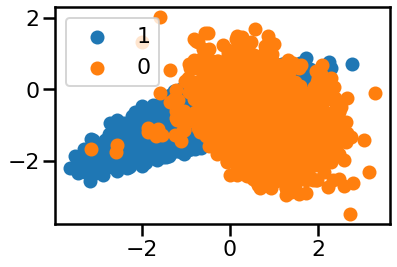

In [15]:
# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

##Resumpling with RandomUnderSampler

In [16]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=10)

X_res, y_res = rus.fit_resample(X, y)

print(sorted(Counter(y_res).items()))

[(0, 2023), (1, 2023)]


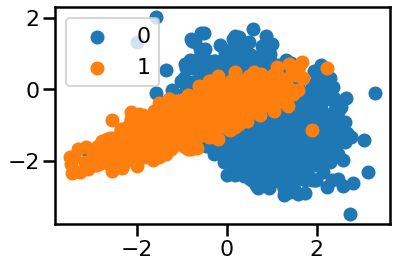

In [17]:
# scatter plot of examples by class label
for label, _ in Counter(y_res).items():
    row_ix = where(y_res == label)[0]
    pyplot.scatter(X_res[row_ix, 0], X_res[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

####Pipeline of transforms with a final estimator RandomUnderSampler

In [18]:
steps = [('under', RandomUnderSampler()), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)

In [19]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X_res, y_res, scoring='f1_micro', cv=cv, n_jobs=-1)
score = mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.832


###Resumpling with RandomOverSampler

In [20]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0)

X_res, y_res = ros.fit_resample(X, y)

print(sorted(Counter(y_res).items()))

[(0, 7977), (1, 7977)]


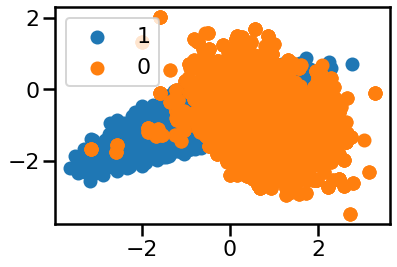

In [21]:
# scatter plot of examples by class label
for label, _ in Counter(y_res).items():
    row_ix = where(y_res == label)[0]
    pyplot.scatter(X_res[row_ix, 0], X_res[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

Pipeline of transforms with a final estimator for RandomOverSampler

In [22]:
steps = [('over', RandomOverSampler()), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)

In [23]:
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X_res, y_res, scoring='f1_micro', cv=cv, n_jobs=-1)
score = mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.960


###Combining Random Oversampling and Undersampling

In [24]:
# instantiating over and under sampler
over = RandomOverSampler(sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy=0.8)

In [25]:
X_over, y_over = over.fit_resample(X, y)
print(f"Oversampled: {Counter(y_over)}")

Oversampled: Counter({1: 7977, 0: 3988})


In [26]:
# now to comine under sampling 
X_combined_sampling, y_combined_sampling = under.fit_resample(X_over, y_over)
print(f"Combined Random Sampling: {Counter(y_combined_sampling)}")
print(sorted(Counter(y_combined_sampling).items()))

Combined Random Sampling: Counter({1: 4985, 0: 3988})
[(0, 3988), (1, 4985)]


In [27]:
steps = [('over', RandomOverSampler()), ('under', RandomUnderSampler()), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)

In [28]:
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X_combined_sampling, y_combined_sampling, scoring='f1_micro', cv=cv, n_jobs=-1)
score = mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.917
